<h1><center>Market Basket Analysis with Apriori</center></h1>


## Description of the Project and Data
***
Using [Online Retail Data Set](http://archive.ics.uci.edu/ml/datasets/Online+Retail)

**Description of the project:**
Market Basket Analysis is a powerful tool for translating vast amounts of customer transaction and viewing data into simple rules for recommendation or relation between one items to another items.

**Data Set Information:**

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a France-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

**Attribute Information:**

- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides.

**Source:**

Daqing Chen, Sai Liang Sain, and Kun Guo, Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining, Journal of Database Marketing and Customer Strategy Management, Vol. 19, No. 3, pp. 197â€“208, 2012 (Published online before print: 27 August 2012. doi: 10.1057/dbm.2012.17).


In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
pd.options.display.max_columns = None
pd.options.display.max_rows = 15

We reduced the row from original data and take only about 50% of them, because we will only do this intuitively and so that our local machine can run the dataset.

# Dataset and preprocessing

In [2]:
# Load the data
data = pd.read_excel(r'Online Retail.xlsx')

__Here, We are displaying the head of the data__

In [3]:
print(data.shape)
display(data.head(10))

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


__In this case, we will drop InvoiceNo that contains "C" or Start with "C" in the invoice. Because in the data it show the quantity negative.__

In [73]:
# Drop Invoice that start with letter c
data['InvoiceNo'] = data['InvoiceNo'].apply(str)
data = data[~data['InvoiceNo'].str.contains("C")]
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


__Explain the initial charachteristic of the data__

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532621 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    532621 non-null  object        
 1   StockCode    532621 non-null  object        
 2   Description  531167 non-null  object        
 3   Quantity     532621 non-null  int64         
 4   InvoiceDate  532621 non-null  datetime64[ns]
 5   UnitPrice    532621 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      532621 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.6+ MB


__We processing and cleaning the data before we use algorithm for Association Rules__

In [6]:
# Clean the description column
data['Description'] = data['Description'].str.strip()
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


__Filtering the data. Also, as we want to see the relation between the goods. We are not really concentrate in the quantity. Therefore, we will encode the goods become 0 and 1__

In [18]:
# Again for efficiency we only take small sample from the dataset, which is the transaction in United Kingdom
basket = (data[data['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

# One hot encode the product columns, to acceptable format for apriori function
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [69]:
display(basket_sets)

Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
InvoiceNo                                                         
536370                            0                           0   
536852                            0                           0   
536974                            0                           0   
537065                            0                           0   
537463                            0                           0   
...                             ...                         ...   
580986                            0                           0   
581001                            0                           0   
581171                            0                           0   
581279                            0                           0   
581587                            0                           0   

Description  12 EGG HOUSE PAINTED WOOD  12 MESSAGE CARDS WITH ENVELOPES  \
InvoiceNo                                                                 
536370                               0                                0   
536852                               0                                0   
536974                               0                                0   
537065                               0                                0   
537463                               0                                0   
...                                ...                              ...   
580986                               0                                0   
581001                               0                                0   
581171                               0                                0   
581279                               0                                0   
581587                               0                                0   

Description  12 PENCIL SMALL TUBE WOODLAND  \
InvoiceNo                                    
536370                                   0   
536852                                   0   
536974                                   0   
537065                                   0   
537463                                   0   
...                                    ...   
580986                                   0   
581001                                   0   
581171                                   0   
581279                                   0   
581587                                   0   

Description  12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE SKULL  \
InvoiceNo                                                                       
536370                                         0                            0   
536852                                         0                            0   
536974                                         0                            0   
537065                                         0                            0   
537463                                         0                            0   
...                                          ...                          ...   
580986                                         0                            0   
581001                                         0                            0   
581171                                         0                            0   
581279                                         0                            0   
581587                                         0                            0   

Description  12 PENCILS TALL TUBE POSY  12 PENCILS TALL TUBE RED RETROSPOT  \
InvoiceNo                                                                    
536370                               0                                   0   
536852                               0                                   0   
536974                               0                                   0   
537065                               0                                   0   
537463                         

__Using apriori algorithm, we define the minimum of the support__

In [20]:
# Import the function
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

__In here, we know which item who have support more than 0.07.__

In [21]:
# Show the itemsets that have atleast 0.2 support values
display(frequent_itemsets)

,support,itemsets
0,0.071429,(4 TRADITIONAL SPINNING TOPS)
1,0.096939,(ALARM CLOCK BAKELIKE GREEN)
2,0.102041,(ALARM CLOCK BAKELIKE PINK)
3,0.094388,(ALARM CLOCK BAKELIKE RED)
4,0.081633,(BAKING SET 9 PIECE RETROSPOT)
...,...,...
46,0.104592,"(PLASTERS IN TIN SPACEBOY, PLASTERS IN TIN WOO..."
47,0.102041,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO..."
48,0.102041,"(SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET..."
49,0.122449,"(SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOT..."


In [27]:
# Create the association rules using lift metric
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [28]:
# Show the rules that have atleast 1 lift value
display(rules)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,0.064088,3.283859
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
4,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.094388,0.102041,0.073980,0.783784,7.681081,0.064348,4.153061
...,...,...,...,...,...,...,...,...,...
21,"(SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...",(SET/6 RED SPOTTY PAPER CUPS),0.102041,0.137755,0.099490,0.975000,7.077778,0.085433,34.489796
22,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",(SET/6 RED SPOTTY PAPER PLATES),0.102041,0.127551,0.099490,0.975000,7.644000,0.086474,34.897959
23,(SET/6 RED SPOTTY PAPER PLATES),"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",0.127551,0.102041,0.099490,0.780000,7.644000,0.086474,4.081633
24,(SET/6 RED SPOTTY PAPER CUPS),"(SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...",0.137755,0.102041,0.099490,0.722222,7.077778,0.085433,3.232653


From above result we can know the set of items that will likely be bought together, let's filter them more by the confidence

In [29]:
rules.sort_values(by=['confidence', 'lift'], ascending=False).head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
22,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",(SET/6 RED SPOTTY PAPER PLATES),0.102041,0.127551,0.099490,0.975000,7.644000,0.086474,34.897959
21,"(SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...",(SET/6 RED SPOTTY PAPER CUPS),0.102041,0.137755,0.099490,0.975000,7.077778,0.085433,34.489796
18,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,0.104878,21.556122
19,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.127551,0.122449,0.888889,6.968889,0.104878,7.852041
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
20,"(SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOT...",(SET/20 RED RETROSPOT PAPER NAPKINS),0.122449,0.132653,0.099490,0.812500,6.125000,0.083247,4.625850
16,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.127551,0.132653,0.102041,0.800000,6.030769,0.085121,4.336735
4,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.094388,0.102041,0.073980,0.783784,7.681081,0.064348,4.153061
23,(SET/6 RED SPOTTY PAPER PLATES),"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",0.127551,0.102041,0.099490,0.780000,7.644000,0.086474,4.081633


In [77]:
support=rules.loc[:,'support']
confidence=rules.loc[:,'confidence']

__Heatmaps help us understand a large number of rules between a small number of antecedents and consequents__

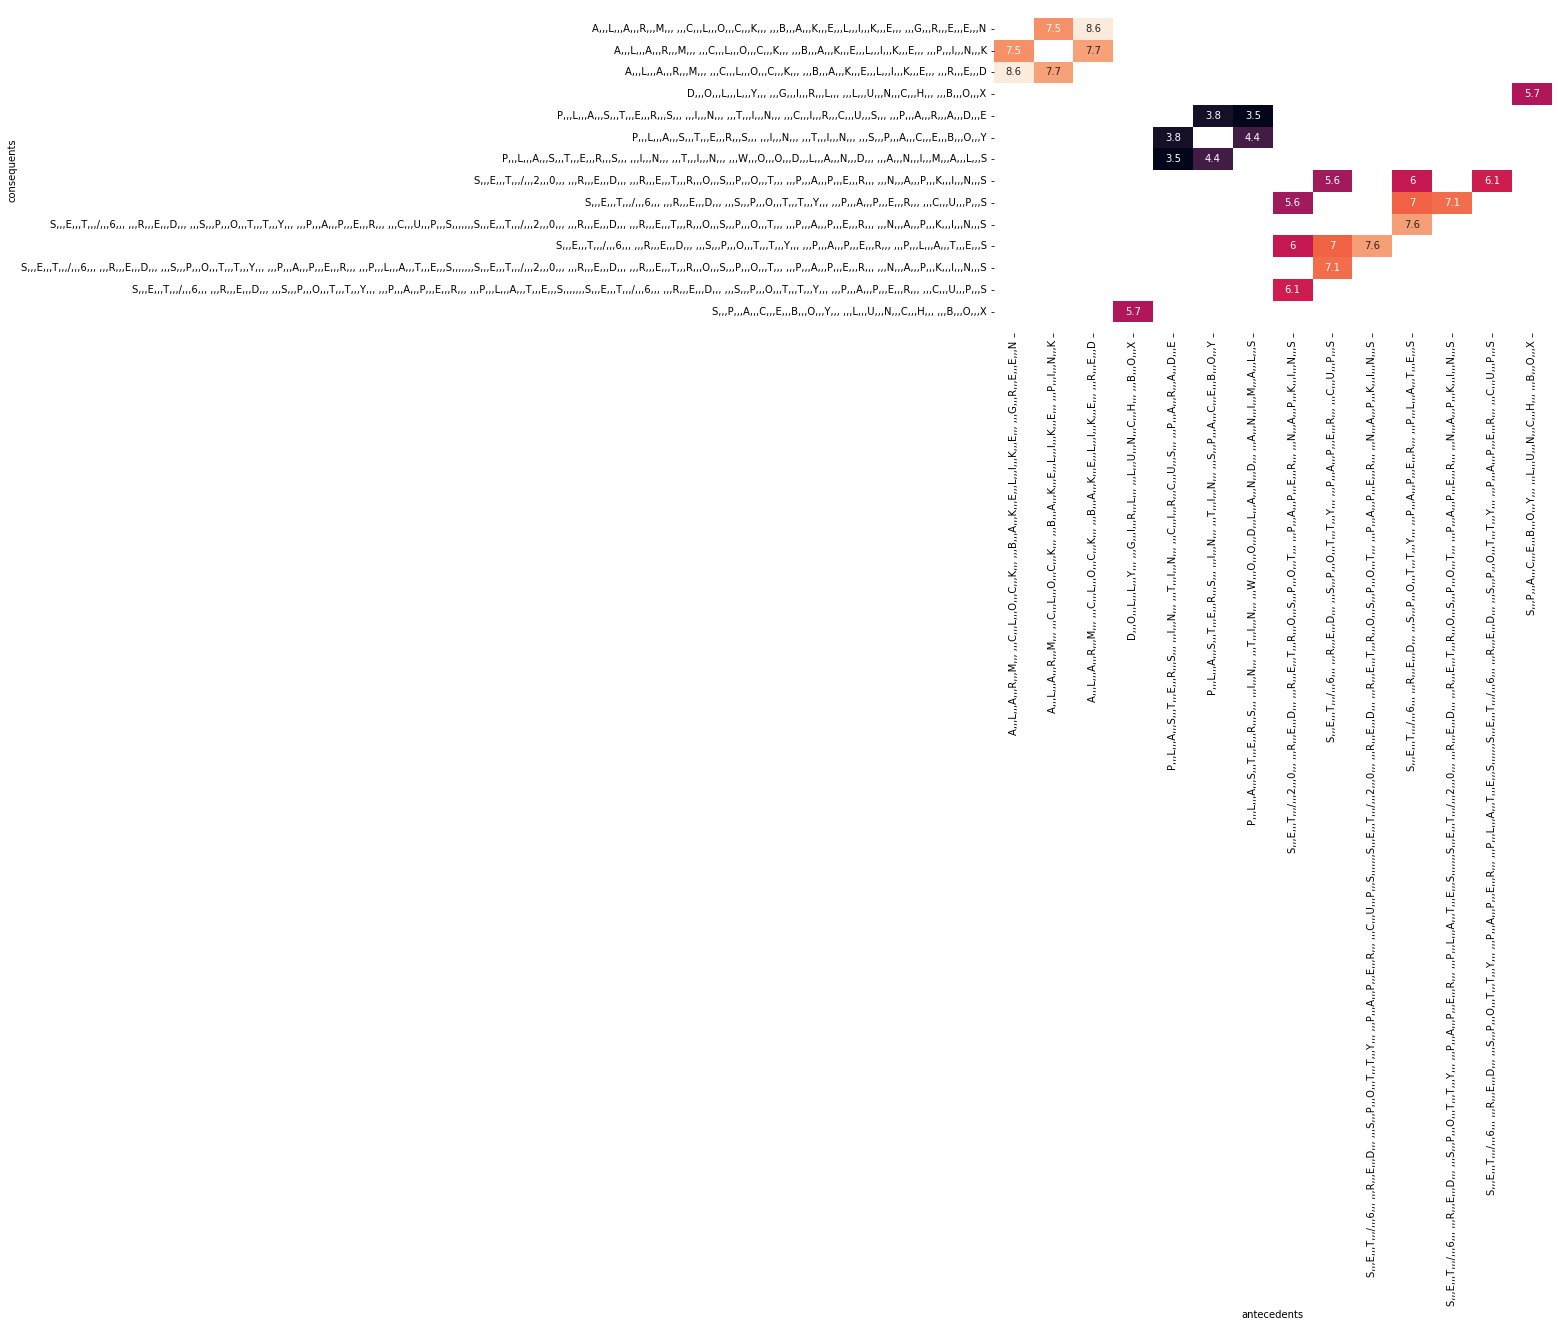

In [84]:
import seaborn as sns

# Convert antecedents and consequents into strings
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Transform antecedent, consequent, and support columns into matrix
support_table = rules.pivot(index='consequents', columns='antecedents', values='lift')

plt.figure(figsize=(10,6))
sns.heatmap(support_table, annot=True, cbar=False)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.yticks(rotation=0)
plt.show() 


## Make comparisson with different country

In [78]:
data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [82]:
basket2 = (data[data['Country'] =="Belgium"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

basket_sets2 = basket2.applymap(encode_units)
basket_sets2.drop('POSTAGE', inplace=True, axis=1)
frequent_itemsets2 = apriori(basket_sets2, min_support=0.07, use_colnames=True)
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.122449,0.091837,0.071429,0.583333,6.351852,0.060183,2.179592
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.091837,0.122449,0.071429,0.777778,6.351852,0.060183,3.948980
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.122449,0.132653,0.102041,0.833333,6.282051,0.085798,5.204082
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.132653,0.122449,0.102041,0.769231,6.282051,0.085798,3.802721
4,(ALARM CLOCK BAKELIKE GREEN),(ROUND SNACK BOXES SET OF4 WOODLAND),0.122449,0.387755,0.071429,0.583333,1.504386,0.023948,1.469388
...,...,...,...,...,...,...,...,...,...
125,"(ROUND SNACK BOXES SET OF4 WOODLAND, DOLLY GIR...","(ROUND SNACK BOXES SET OF 4 FRUITS, SPACEBOY L...",0.173469,0.102041,0.071429,0.411765,4.035294,0.053728,1.526531
126,(ROUND SNACK BOXES SET OF 4 FRUITS),"(SPACEBOY LUNCH BOX, DOLLY GIRL LUNCH BOX, ROU...",0.224490,0.132653,0.071429,0.318182,2.398601,0.041649,1.272109
127,(SPACEBOY LUNCH BOX),"(ROUND SNACK BOXES SET OF 4 FRUITS, ROUND SNAC...",0.234694,0.091837,0.071429,0.304348,3.314010,0.049875,1.305485
128,(DOLLY GIRL LUNCH BOX),"(ROUND SNACK BOXES SET OF 4 FRUITS, SPACEBOY L...",0.234694,0.091837,0.071429,0.304348,3.314010,0.049875,1.305485


In [80]:
rules2.sort_values(by=['confidence', 'lift'], ascending=False).head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
106,"(ROUND SNACK BOXES SET OF4 WOODLAND, PLASTERS ...",(ROUND SNACK BOXES SET OF 4 FRUITS),0.071429,0.224490,0.071429,1.000000,4.454545,0.055394,inf
81,"(ROUND SNACK BOXES SET OF 4 FRUITS, DOLLY GIRL...",(ROUND SNACK BOXES SET OF4 WOODLAND),0.091837,0.387755,0.091837,1.000000,2.578947,0.056227,inf
98,"(LUNCH BAG WOODLAND, ROUND SNACK BOXES SET OF ...",(ROUND SNACK BOXES SET OF4 WOODLAND),0.081633,0.387755,0.081633,1.000000,2.578947,0.049979,inf
105,"(ROUND SNACK BOXES SET OF 4 FRUITS, PLASTERS I...",(ROUND SNACK BOXES SET OF4 WOODLAND),0.071429,0.387755,0.071429,1.000000,2.578947,0.043732,inf
116,"(ROUND SNACK BOXES SET OF 4 FRUITS, SPACEBOY L...",(ROUND SNACK BOXES SET OF4 WOODLAND),0.071429,0.387755,0.071429,1.000000,2.578947,0.043732,inf
110,"(ROUND SNACK BOXES SET OF 4 FRUITS, SPACEBOY L...",(ROUND SNACK BOXES SET OF4 WOODLAND),0.102041,0.387755,0.091837,0.900000,2.321053,0.052270,6.122449
7,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.091837,0.132653,0.081633,0.888889,6.700855,0.069450,7.806122
12,(CHILDRENS CUTLERY DOLLY GIRL),(CHILDRENS CUTLERY SPACEBOY),0.081633,0.112245,0.071429,0.875000,7.795455,0.062266,7.102041
11,(CHARLOTTE BAG PINK POLKADOT),(RED RETROSPOT CHARLOTTE BAG),0.081633,0.142857,0.071429,0.875000,6.125000,0.059767,6.857143
93,"(SPACEBOY LUNCH BOX, ROUND SNACK BOXES SET OF4...",(DOLLY GIRL LUNCH BOX),0.153061,0.234694,0.132653,0.866667,3.692754,0.096731,5.739796


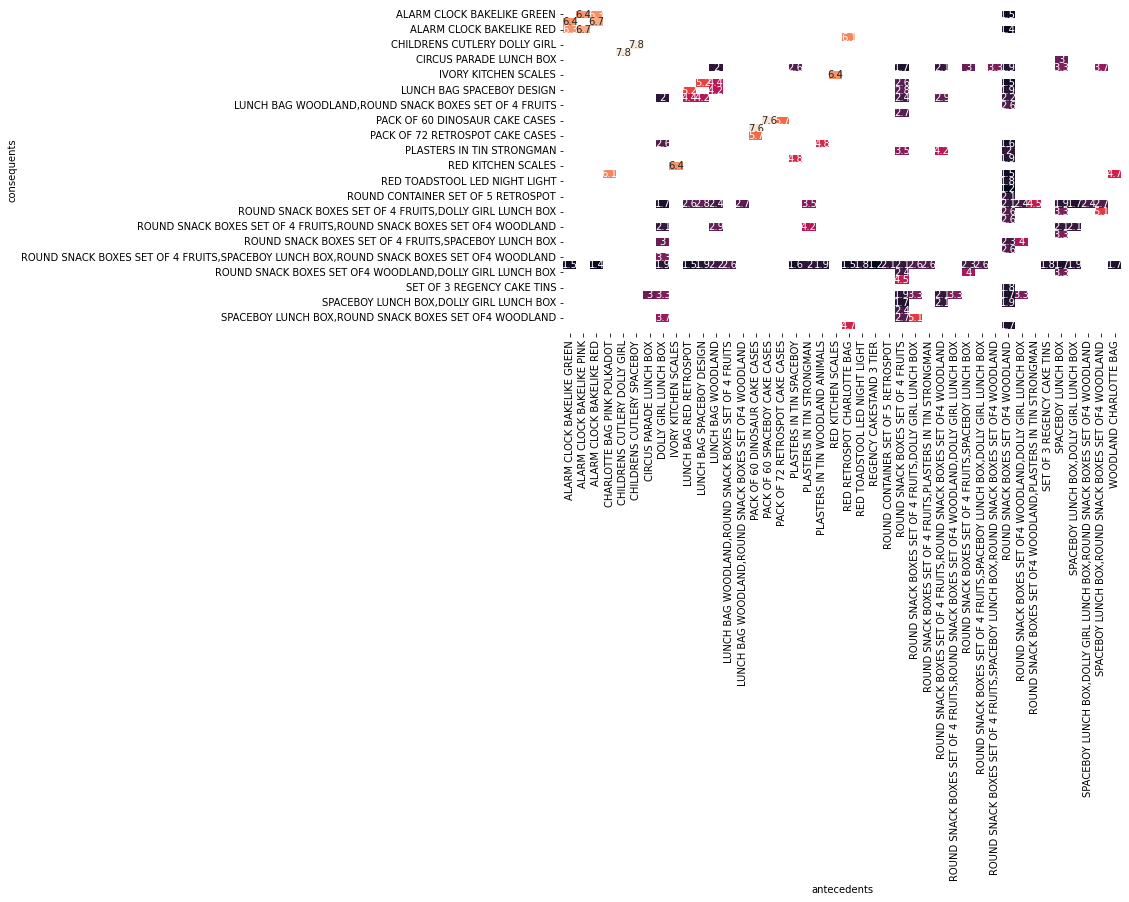

In [83]:
# Convert antecedents and consequents into strings
rules2['antecedents'] = rules2['antecedents'].apply(lambda a: ','.join(list(a)))
rules2['consequents'] = rules2['consequents'].apply(lambda a: ','.join(list(a)))

# Transform antecedent, consequent, and support columns into matrix
support_table = rules2.pivot(index='consequents', columns='antecedents', values='lift')

plt.figure(figsize=(10,6))
sns.heatmap(support_table, annot=True, cbar=False)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.yticks(rotation=0)
plt.show()

# Conclussion

From above results we can see the different trend between French and Belgian. Belgian tend to become variety than france in this model. As you can see, the association item in the france, only in several item. For example, clock in which it happend because of different colour. On the other hand, in belgian, some association happen with the different items.